In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as mno
warnings.filterwarnings('ignore')

##  数据探索 只分析Block 32

In [77]:
Block_32 = pd.read_csv('../Block 32.csv')
Block_42 = pd.read_csv('../Block 42.csv')
Block_list = [Block_32, Block_42]# list里面装的只是Block的引用

In [25]:
print('Block shape: ',Block_32.shape)
print('-'*64)
print(Block_32.info())
print('-'*64)
print(Block_32.describe(include = 'all') )
print('-'*64)
Block_32.head()

Block shape:  (145283, 29)
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145283 entries, 0 to 145282
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   label   145283 non-null  float64
 1   1       145283 non-null  float64
 2   2       145283 non-null  float64
 3   3       145283 non-null  float64
 4   4       145283 non-null  float64
 5   5       145283 non-null  float64
 6   6       145283 non-null  float64
 7   7       145283 non-null  float64
 8   8       145283 non-null  float64
 9   9       145283 non-null  float64
 10  10      145283 non-null  float64
 11  11      145283 non-null  float64
 12  12      145283 non-null  float64
 13  13      145283 non-null  float64
 14  14      145283 non-null  float64
 15  15      145283 non-null  float64
 16  16      145283 non-null  float64
 17  17      145283 non-null  float64
 18  18      145283 non-null  float64

,label,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.433915,-1.431788,-0.910216,0.574940,-0.260742,1.021146,0.072261,-1.080976,0.000000,...,1.387856,0.527005,0.000000,0.503087,0.803241,0.984406,0.617083,0.222115,0.535785,0.592101
1,0.0,1.390137,0.465503,-0.016887,0.325299,-1.555042,2.007755,0.628771,-1.512280,2.173076,...,1.699332,1.168483,0.000000,0.753208,0.690357,0.986982,1.373340,2.159470,1.184173,1.004471
2,1.0,1.022472,-1.272057,1.211679,0.516378,-1.195354,0.376597,-2.131000,-1.358718,0.000000,...,0.171101,-0.739965,1.550981,0.864652,1.068990,0.985669,0.963442,0.765230,0.870297,0.774876
3,1.0,0.527615,-0.771437,1.185045,0.975152,1.214986,1.262256,1.864578,-0.997820,0.000000,...,-0.949879,0.029249,3.101961,0.796671,1.151834,0.990740,0.586028,0.550446,0.930468,1.877579
4,0.0,1.031622,-0.347761,-0.080696,0.476754,1.028310,0.681100,-0.904105,0.551210,2.173076,...,-0.775819,-1.384218,0.000000,0.935017,1.231321,0.989604,0.867541,1.083954,0.987838,0.847523


<AxesSubplot:>

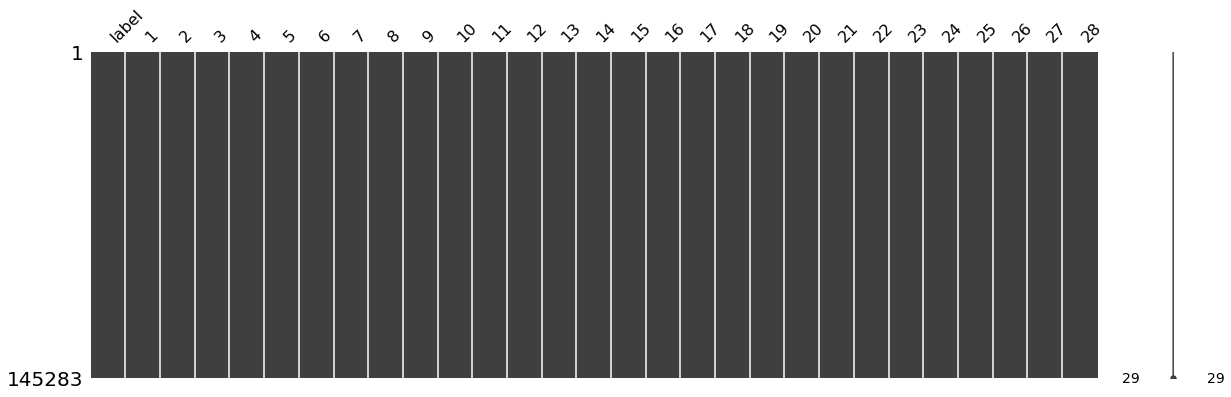

In [9]:
# 模型不含缺失值
mno.matrix(Block_32, figsize=(20,6))

## 查看特征之间的相关性

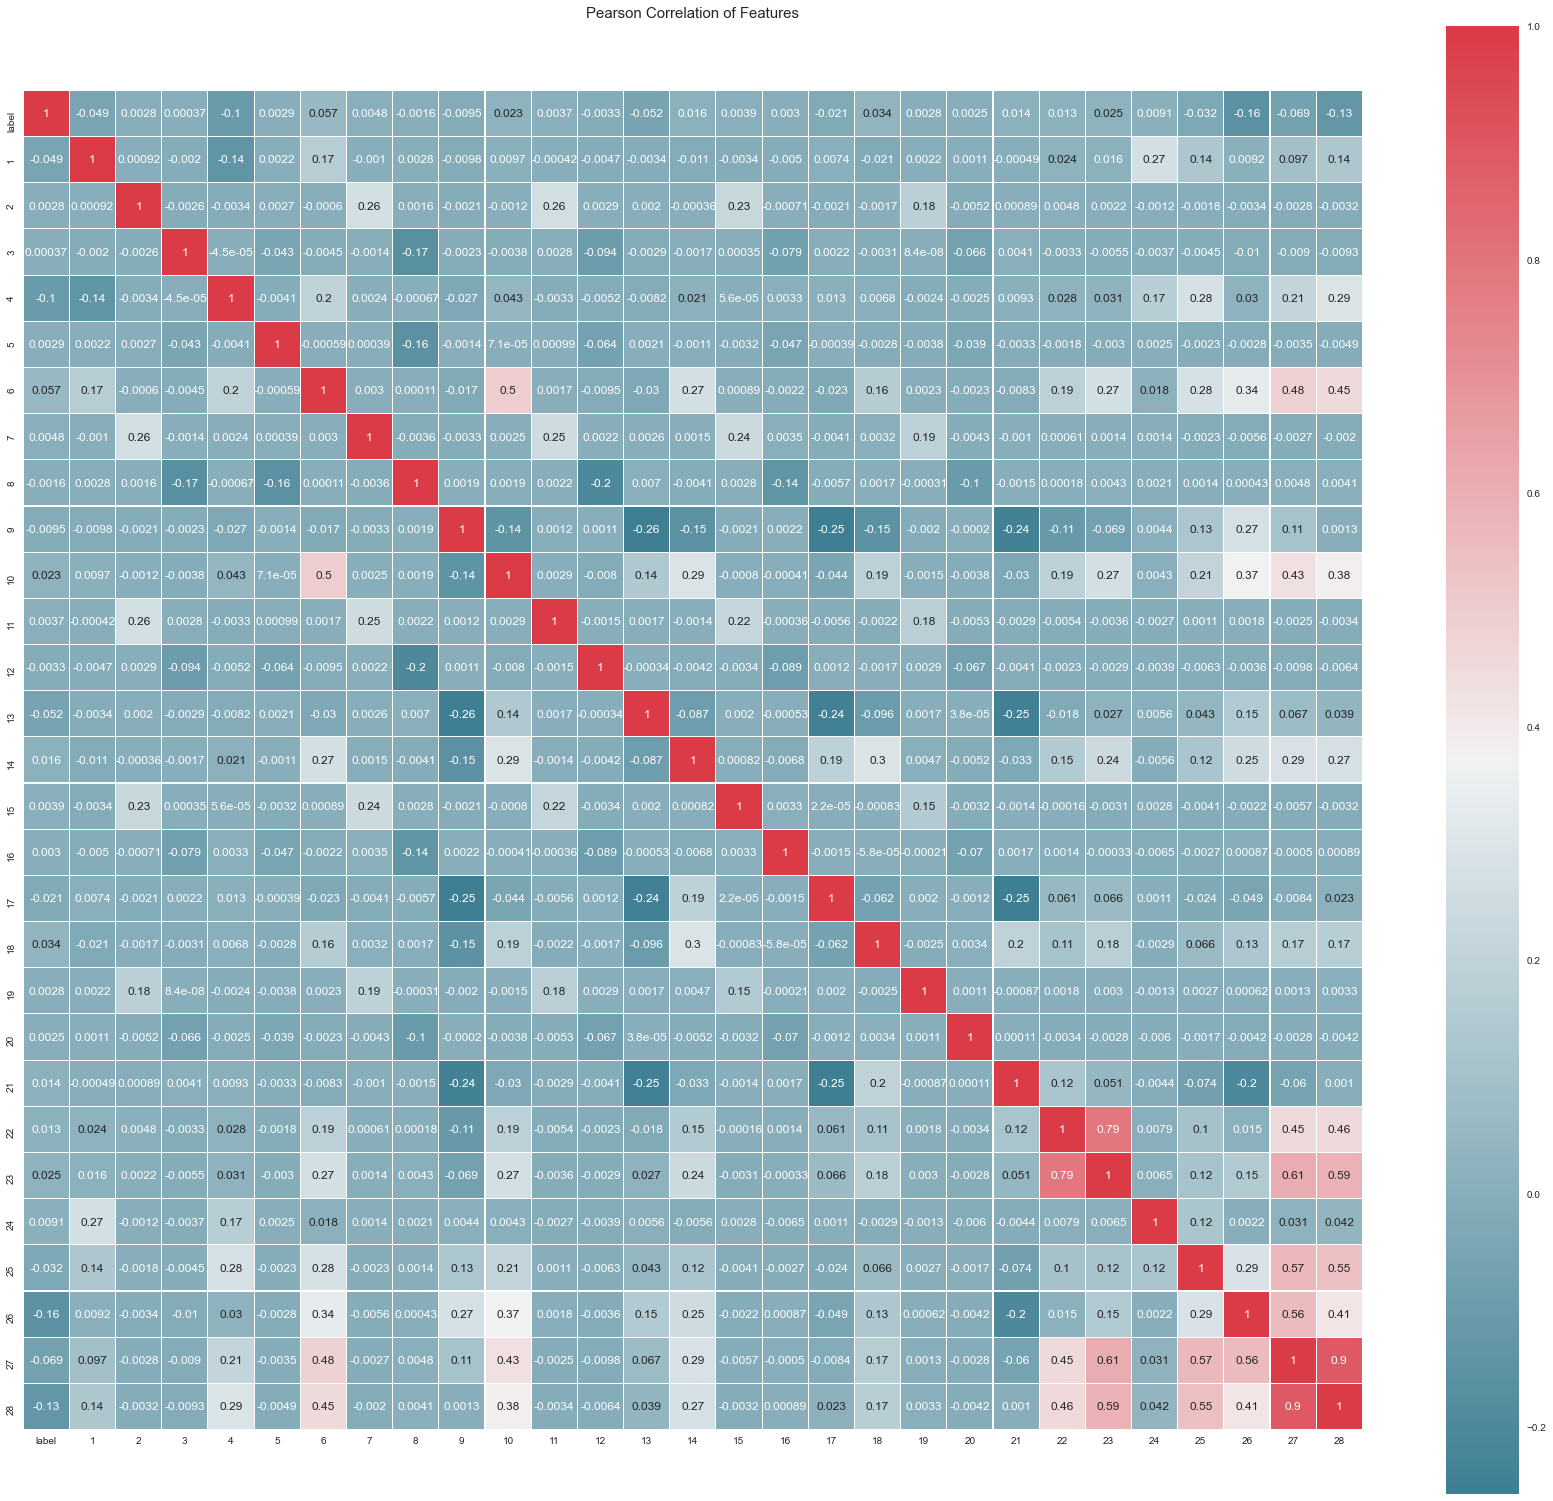

In [41]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(30, 30))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(Block_32)

##  观察特征分布

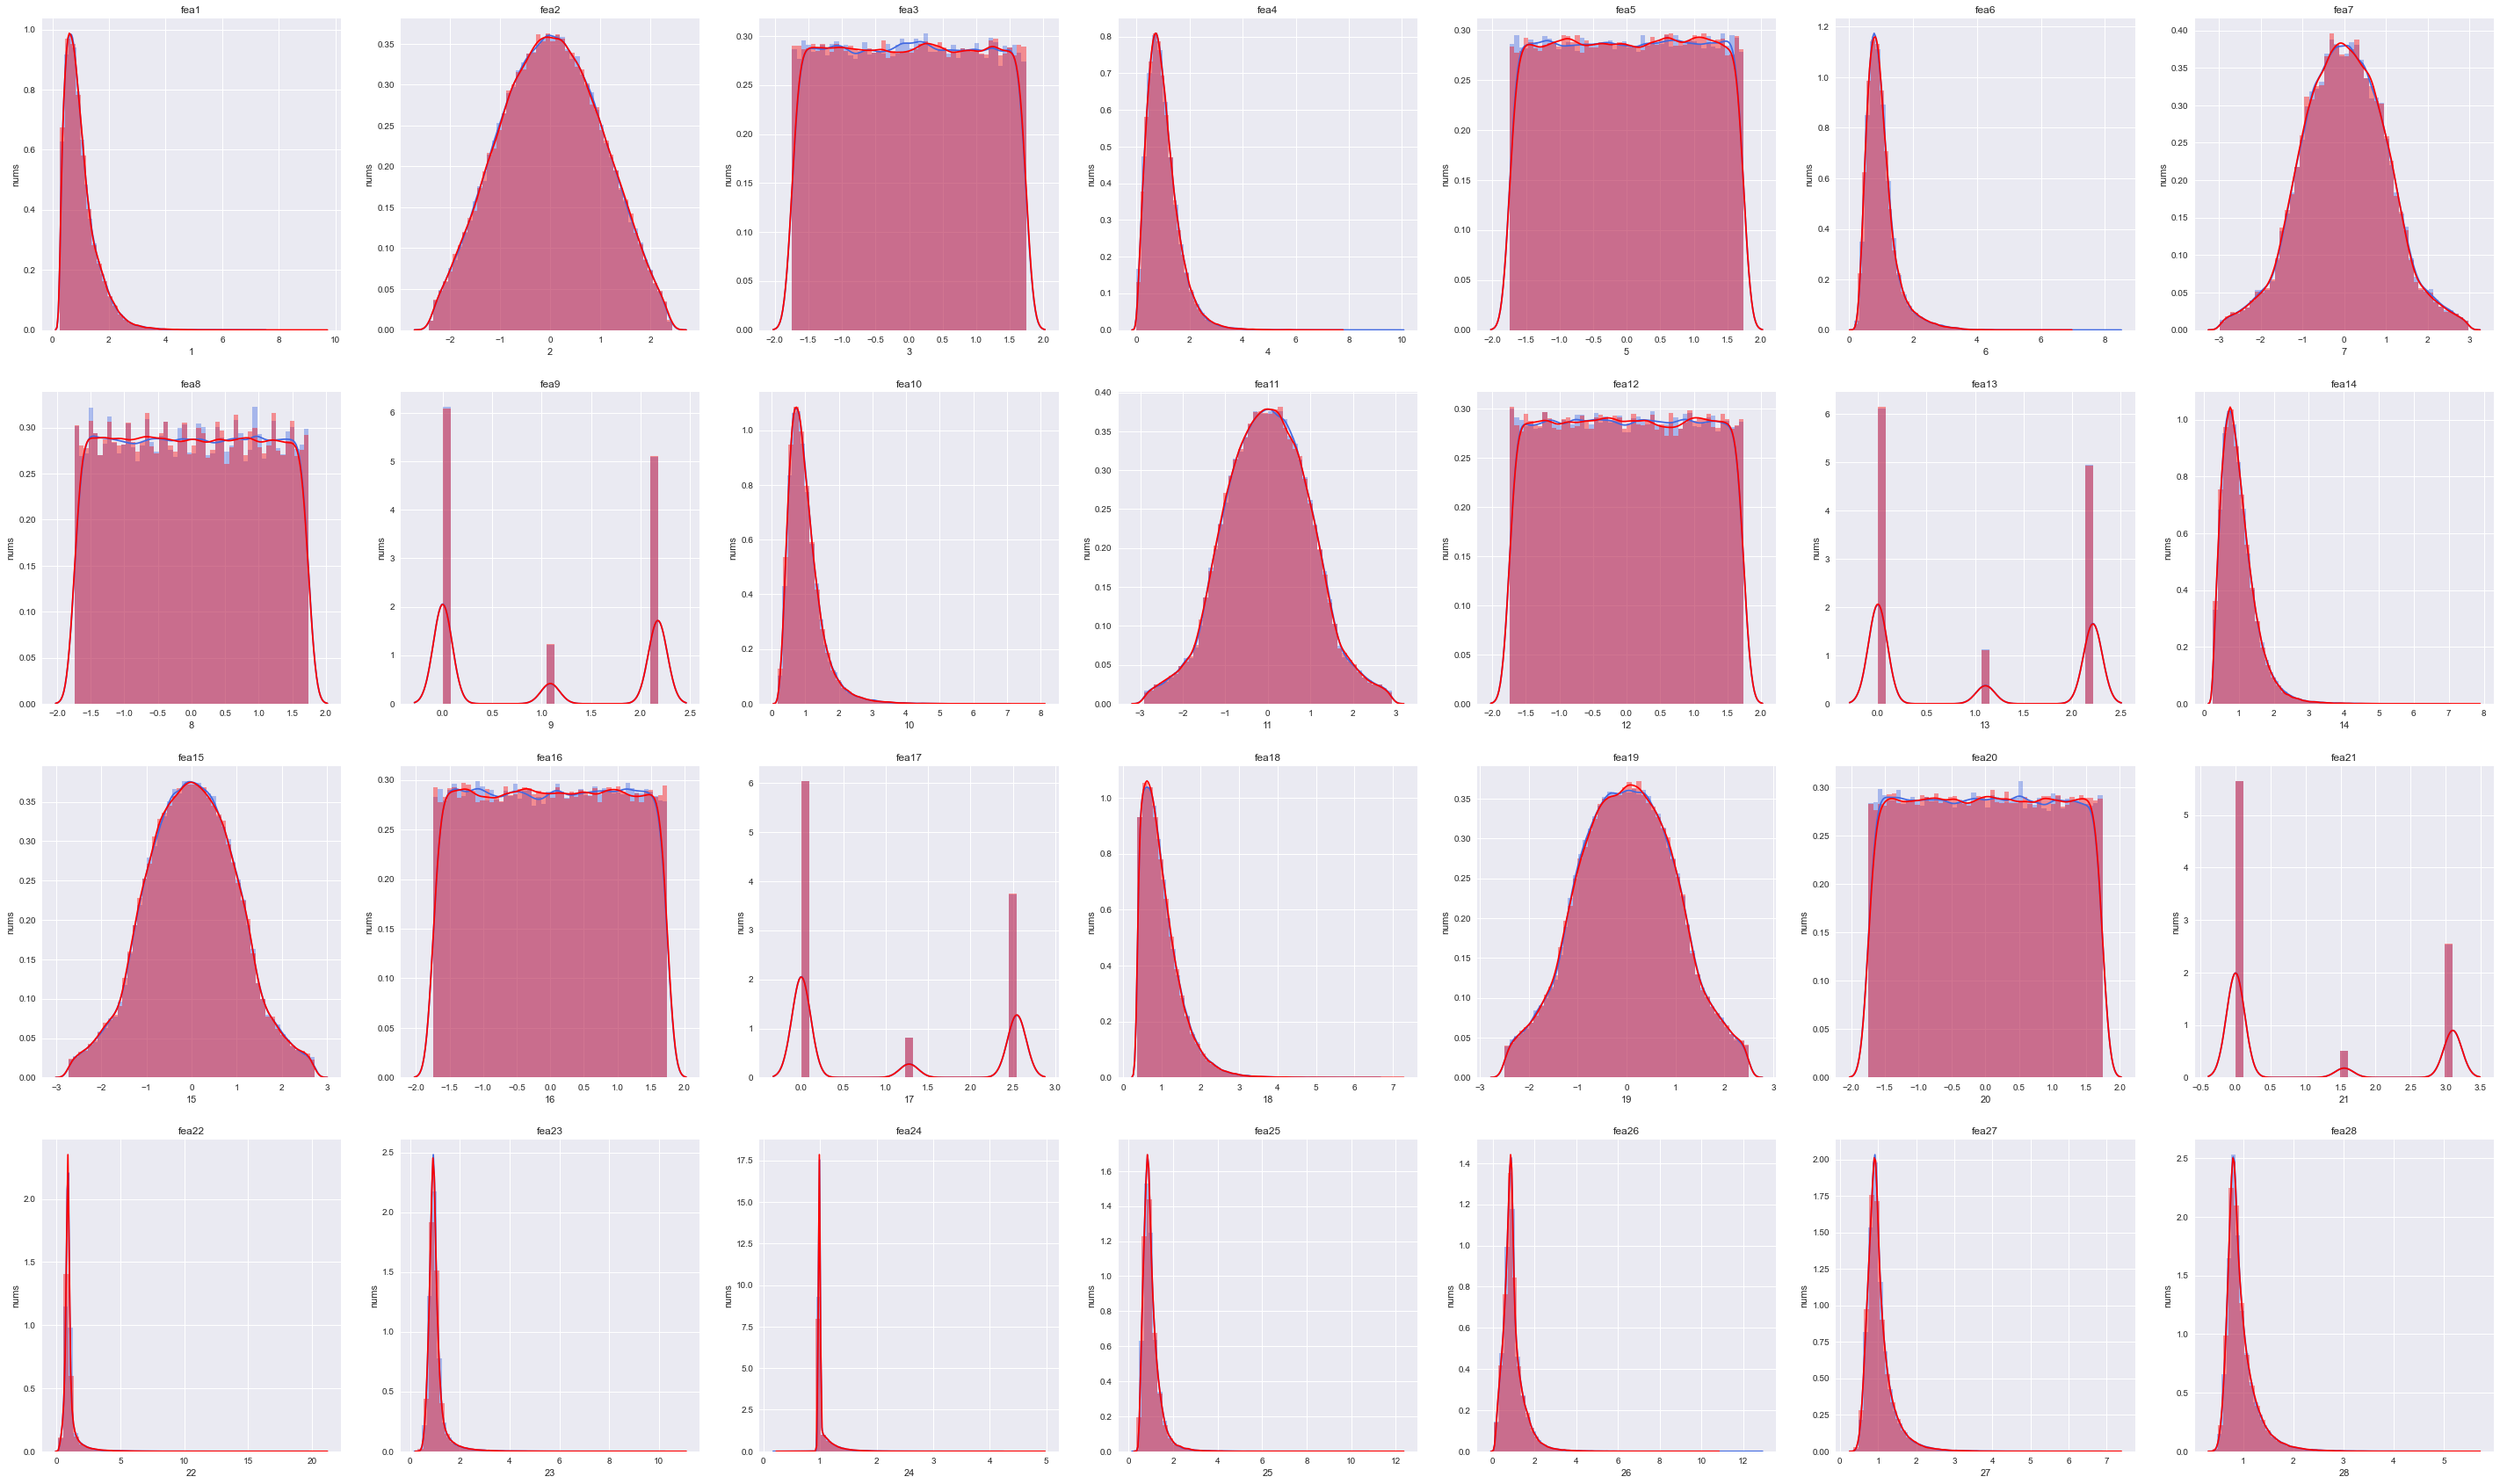

In [42]:
plt.style.use('seaborn')

fig, axes = plt.subplots(ncols=7, nrows=4,figsize=[50,30])
for i, ax in zip(range(1,29), axes.flat):
    ax.set_title('fea'+str(i))
    ax.set_xlabel('values')
    ax.set_ylabel('nums')
    sns.distplot(Block_32.iloc[:,i],
        hist=True,kde=True, ax=ax,color='royalblue')
    sns.distplot(Block_42.iloc[:,i],
        hist=True,kde=True, ax=ax,color='red')
plt.show()

### 可以观察到，两个RSP数据块的特征分布十分相似，这说明我们分割数据块的方式是正确的


##  特征选择

In [33]:
# # 筛除一些线性相关性高的特征
# threshold = 0.8
# corr_matrix = Block_32.corr().abs()
# corr_matrix.head()

,label,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
label,1.000000,0.049042,0.002773,0.000374,0.101762,0.002874,0.057307,0.004773,0.001612,0.009482,...,2.823637e-03,0.002533,0.013961,0.013414,0.024853,0.009060,0.031995,0.158178,0.069224,0.125968
1,0.049042,1.000000,0.000916,0.001962,0.138034,0.002242,0.169610,0.001034,0.002831,0.009758,...,2.183466e-03,0.001051,0.000488,0.024021,0.015882,0.266480,0.137522,0.009214,0.097341,0.139975
2,0.002773,0.000916,1.000000,0.002620,0.003350,0.002674,0.000603,0.259411,0.001605,0.002077,...,1.823497e-01,0.005170,0.000894,0.004788,0.002203,0.001175,0.001760,0.003377,0.002777,0.003205
3,0.000374,0.001962,0.002620,1.000000,0.000045,0.042865,0.004532,0.001404,0.165853,0.002303,...,8.430510e-08,0.066265,0.004135,0.003272,0.005541,0.003686,0.004533,0.010436,0.009004,0.009291
4,0.101762,0.138034,0.003350,0.000045,1.000000,0.004074,0.195967,0.002398,0.000674,0.027332,...,2.383057e-03,0.002478,0.009259,0.027693,0.030629,0.172595,0.278151,0.030006,0.212669,0.294996


In [34]:
# upper = corr_matrix.where(
#     np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
# )
# upper.head()

,label,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
label,NaN,0.049042,0.002773,0.000374,0.101762,0.002874,0.057307,0.004773,0.001612,0.009482,...,2.823637e-03,0.002533,0.013961,0.013414,0.024853,0.009060,0.031995,0.158178,0.069224,0.125968
1,NaN,NaN,0.000916,0.001962,0.138034,0.002242,0.169610,0.001034,0.002831,0.009758,...,2.183466e-03,0.001051,0.000488,0.024021,0.015882,0.266480,0.137522,0.009214,0.097341,0.139975
2,NaN,NaN,NaN,0.002620,0.003350,0.002674,0.000603,0.259411,0.001605,0.002077,...,1.823497e-01,0.005170,0.000894,0.004788,0.002203,0.001175,0.001760,0.003377,0.002777,0.003205
3,NaN,NaN,NaN,NaN,0.000045,0.042865,0.004532,0.001404,0.165853,0.002303,...,8.430510e-08,0.066265,0.004135,0.003272,0.005541,0.003686,0.004533,0.010436,0.009004,0.009291
4,NaN,NaN,NaN,NaN,NaN,0.004074,0.195967,0.002398,0.000674,0.027332,...,2.383057e-03,0.002478,0.009259,0.027693,0.030629,0.172595,0.278151,0.030006,0.212669,0.294996


In [39]:
# # Drop the correlated Variables
# to_drop = [columns for columns in upper.columns if any(upper[columns] > threshold)]
# print('There are %d columns to remove.' % (len(to_drop)))

# # Drop the correlated Variables
# Block_32 = Block_32.drop(columns = to_drop)
# print('Block_32 shape: ',Block_32.shape)

There are 1 columns to remove.
Block_32 shape:  (145283, 28)


In [76]:
# 把特征选择封装一波
def corr_feature_selection(df_list, threshold = 0.6):
    to_drop = []
    for df in df_list:
        # 筛除一些线性相关性高的特征
        corr_matrix = df.corr().abs()
        upper = corr_matrix.where(
            np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
        )
        to_drop_tmp = [columns for columns in upper.columns if any(upper[columns] > threshold)]
        to_drop.extend(to_drop_tmp)# 并入
    to_drop = list(set(to_drop))# 各个数据块取并集并去重
    print('There are %d columns to remove.' % (len(to_drop)))

    # Drop the correlated Variables
    for i, df in enumerate(df_list):
        df_list[i] = df.drop(columns = to_drop)
        print('data{0} shape:{1}'.format(i, df_list[i].shape))
    return df_list

In [78]:
Block_list = corr_feature_selection(Block_list)

There are 3 columns to remove.
data0 shape:(145283, 26)
data1 shape:(145283, 26)


###  删除了三个特征

##  模型